In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
from nltk.tokenize import word_tokenize
##https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e 
##https://unipython.com/curso-de-procesamiento-de-textos-gensim/

In [2]:
df= pd.read_excel('./859181_INDICES_v_3_conductas.xlsx', header= 4)

In [3]:
##df.drop (columns=[0])
df ['Fecha']=pd.to_datetime(df['Fecha'])
df.head()
#df= df.drop(columns=[1])
#df= df.drop(columns=[10])

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Conducta,Sancion,DETALLE,Unnamed: 9
0,NaN,326599,2002-10-17,46,"Beverage Associates Corp, Quilmes Industrialm ...",Mercado de la cerveza,Carteles - Acuerdo de Precios - Archivo,Archivo,Realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],The Buenos Aires Herald Ltda. / Sociedad de Di...,Distribución de diarios.,Distribución - Negativa -,Archivo,_,NaN
2,NaN,321373,1981-04-12,124,Acindar Industria Argentina de Aceros S.A. / S...,MANUFACTURING Fabricación de metales comunes -...,Póliticas de precios - Guerra de precios - Con...,Archivo,Para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,Juan Ignacio Borchex y Oscar Dos Reis / Asocia...,Servicio funerario,Abuso de posición dominante,Archivo,Extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,Tiboni y Cía S.R.L. / Sorensen y Cía. S.R.L.,Pantógrafos (calado o perforado de cristales p...,Trato exclusivo - patentes,Archivo,La denunciada ejerció una serie de presiones s...,NaN


In [4]:
df.shape
##la base de datos total de conductas es de 855 - 834= 21
#hay que ver cuales faltan. 

(834, 10)

# Normalizacion

In [5]:
#convertir todas las que son str lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

#eliminar los simbolos
df['Mercado'] = [re.sub("[\W+]",' ', str(x)) for x in df['Mercado']]
df['Conducta']= [re.sub("[\W+]",' ', str(x)) for x in df['Conducta']]

##convertir esto en una lista de palabras a eliminar.
filtrar = ['mercado', 'servicio', 'servicios', 'fabricación', 'fabricacion', 'fabricacion', 'manufacturing', 'mencionado', 'productos']
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Conducta'] = df['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

##Tareas: en donde es nan el mercado, buscar completar. 

In [6]:
df

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Conducta,Sancion,DETALLE,Unnamed: 9
0,NaN,326599,2002-10-17,46,"beverage associates corp, quilmes industrialm ...",cerveza,carteles acuerdo precios archivo,archivo,realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],the buenos aires herald ltda. / sociedad de di...,distribución diarios,distribución negativa,archivo,_,NaN
2,NaN,321373,1981-04-12,124,acindar industria argentina de aceros s.a. / s...,metales comunes siderurgico,póliticas precios guerra precios conducta excl...,archivo,para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,juan ignacio borchex y oscar dos reis / asocia...,funerario,abuso posición dominante,archivo,extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,tiboni y cía s.r.l. / sorensen y cía. s.r.l.,pantógrafos calado perforado cristales automóv...,trato exclusivo patentes,archivo,la denunciada ejerció una serie de presiones s...,NaN
...,...,...,...,...,...,...,...,...,...,...
829,NaN,986108 + 986109,2017-03-14,180,"colegio de farmacéuticos de tucumán, asociació...",actividades sanitarias sociales,medida cautelar asociación cámara colegio,medida cautelar,ordénase al colegio de farmacéuticos de tucumá...,NaN
830,NaN,342684,2011-02-07,17,la veloz del norte,nan,nan,multa,denuncia efectuada por las firmas empresa almi...,NaN
831,NaN,987339,2019-09-19,605,colegio de farmacéuticos de tucumán s/ infracc...,actividades sanitarias sociales dispensa medic...,artículo 53 ley n 25 156 recurso directo apela...,desestímanse por inadmisibles los recursos dir...,"con fecha 8 de febrero de 2018, la asociación...",NaN
832,NaN,987340,2019-09-19,595,cooperativa eléctrica y anexos ltada. c.e.y.a....,información comunicación televisión cable,cumplimiento compromiso,archivo,NaN,NaN


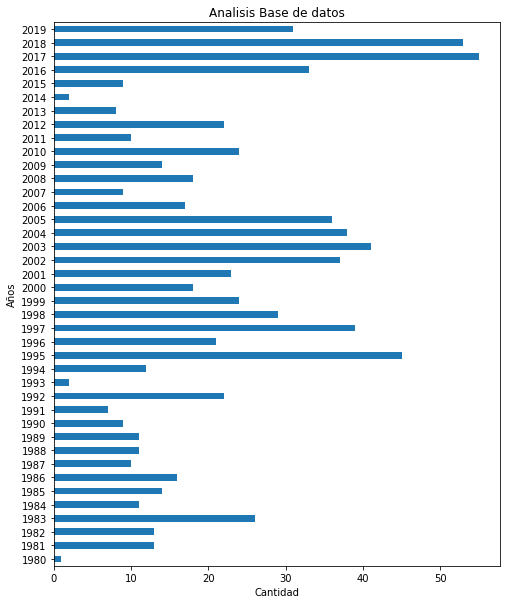

In [7]:
plt.figure(figsize=(8,10))
df.groupby(df.Fecha.dt.year).size().plot(kind='barh')
plt.ylabel('Años')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [8]:
###pip install --upgrade gensim

In [9]:
from gensim.models.keyedvectors import KeyedVectors
modelo = KeyedVectors.load_word2vec_format("./SBW-vectors-300-min5.bin.gz", binary=True)

##Documents/Medios/Python/Data Science/Bomchil/SBW-vectors-300-min5.bin.gz
###https://unipython.com/curso-de-procesamiento-de-textos-gensim/

In [10]:
modelo.most_similar(positive=["cerveza"],topn=3)
#solucionar los plurales. 

[('cervezas', 0.8439282774925232),
 ('bebida', 0.7717876434326172),
 ('bebidas', 0.7246816754341125)]

In [11]:
modelo.most_similar(positive=["distribucion","diarios"],topn=3)

[('mensuarios', 0.6806058883666992),
 ('OJDinteractiva', 0.6489880084991455),
 ('MMPCD', 0.6463779807090759)]

In [17]:
df_mercado=df ['Mercado']
df_mercado.dropna (inplace=True)

In [18]:
df_mercado= df_mercado.apply(word_tokenize)
df_mercado

#encontrar la manera de que itere. 

0                                              [cerveza]
1                                [distribución, diarios]
2                        [metales, comunes, siderurgico]
3                                            [funerario]
4      [pantógrafos, calado, perforado, cristales, au...
                             ...                        
829                  [actividades, sanitarias, sociales]
830                                                [nan]
831    [actividades, sanitarias, sociales, dispensa, ...
832       [información, comunicación, televisión, cable]
833    [venta, mayor, combustibles, sólidos, líquidos...
Name: Mercado, Length: 834, dtype: object

In [15]:
df_mercado = [modelo.most_similar(positive=[x],topn=3) for x in df_mercado]

##df_mercado= [re.sub("[\W+]",' ', str(x)) for x in df['Mercado']]

ValueError: not enough values to unpack (expected 2, got 1)